### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# Take Home Exercises 

In [427]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [428]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [429]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [430]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [431]:
print(twenty_train.target_names)
print(len(twenty_train.data))
len(twenty_train.filenames)
print("\n".join(twenty_train.data[0].split("\n")))
print(twenty_train.target_names[twenty_train.target[0]])
twenty_train.target[0]

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
2257
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

comp.graphics


1

In [432]:
twenty_train.target[:10]
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [433]:
twenty_train.data[:3]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [434]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

print(len(X))
print(X[:2])
for t in X['text'][:3]:
    print(t)

2257
                                                text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of

In [435]:
# add category to the dataframe
X['category'] = twenty_train.target
X[:3]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3


In [436]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[:10][['text', 'category_name']]
X[-10:]
X.iloc[::10, 0:2][0:10]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0


In [437]:
print(X.loc[::10, 'text'][0:10])
X[::10][:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


### Exercise 2

In [438]:
print(X[:10])
print(X.sample(n=10))
X.loc[:, ["text", "category_name"]].sample(n=10)
print(X.iat[6,0])
X.at[6, "text"]

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci

"From: jodfishe@silver.ucs.indiana.edu (joseph dale fisher) Subject: Re: anger Organization: Indiana University Lines: 34  In article <Apr.17.01.10.44.1993.2232@geneva.rutgers.edu> news@cbnewsk.att.com writes: >>Paul Conditt writes: [insert deletion of Paul's and Aaron's discourse on anger, ref Galatians 5:19-20] > >I don't know why it is so obvious.  We are not speaking of acts of the  >flesh.  We are just speaking of emotions.  Emotions are not of themselves >moral or immoral, good or bad.  Emotions just are.  The first step is >not to label his emotion as good or bad or to numb ourselves so that >we hide our true feelings, it is to accept ourselves as we are, as God >accepts us.    Oh, but they definitely can be.  Please look at Colossians 3:5-10 and Ephesians 4:25-27.  Emotions can be controlled and God puts very strong emphasis on self-control, otherwise, why would he have Paul write to Timothy so much about making sure to teach self-control?   [insert deletion of remainder of par

### Exercise 3

In [439]:
X[X['category_name']=='comp.graphics'].iloc[::10][:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


In [440]:
X.isnull()
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### Exercise 4

In [441]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [442]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series
result_with_series = X.append(dummy_series, ignore_index=True)
len(result_with_series)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [443]:
dummy_dict = [{'text': 'dummy_record', 
               'category':1
                }]
X = X.append(dummy_dict, ignore_index=True)
len(X)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [444]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
len(X)

2257

### Exercise 5

In [445]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer:** The funciton isnull() only looks up missing values. 2,3,and 5 are string values not missig values.

In [446]:
X.duplicated()
sum(X.duplicated())
sum(X.duplicated('text'))

0

In [447]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

X = X.append(dummy_duplicate_dict, ignore_index=True)
len(X)
sum(X.duplicated('text'))

1

In [448]:
X.drop_duplicates(keep=False, inplace=True)
len(X)

2257

In [449]:
X_sample = X.sample(n=1000)
len(X_sample)
X_sample[:4]

,text,category,category_name
471,From: reedr@cgsvax.claremont.edu Subject: Q th...,3,soc.religion.christian
1489,From: cs89mcd@brunel.ac.uk (Michael C Davis) S...,3,soc.religion.christian
193,From: ehgasm2@uts.mcc.ac.uk (Simon Marshall) S...,1,comp.graphics
145,From: todamhyp@charles.unlv.edu (Brian M. Huey...,2,sci.med


### Exercise 6

**Answer**: Now X only contains 1000 samples in random order compared to before that contains 2257 samples in order.

In [450]:
import matplotlib.pyplot as plt
%matplotlib inline

In [451]:
categories
X.category_name.value_counts()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

<AxesSubplot:title={'center':'Category distribution'}>

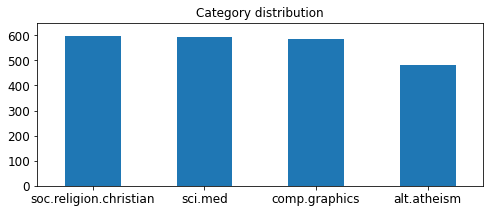

In [452]:
X.category_name.value_counts().plot(kind='bar',
                                  title='Category distribution',
                                  ylim=[0,650],
                                  rot=0, fontsize=12, figsize=(8,3))

comp.graphics             283
soc.religion.christian    257
sci.med                   234
alt.atheism               226
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

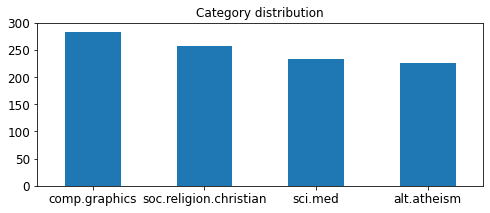

In [453]:
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution',
                                           ylim=[0,300],
                                           rot=0, fontsize=12, figsize=(8,3))

### Exercise 7

<AxesSubplot:title={'center':'Category distribution'}>

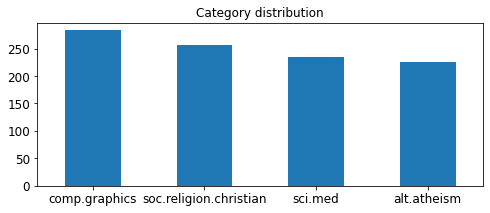

In [454]:
X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution',
                                           rot=0, fontsize=12, figsize=(8,3))


**Answer:** We can just eliminate the ylim parameter to let the machine automate it.

### Exercise 8

<AxesSubplot:title={'center':'Category distribution between X and X_sample'}, xlabel='Category', ylabel='Counts'>

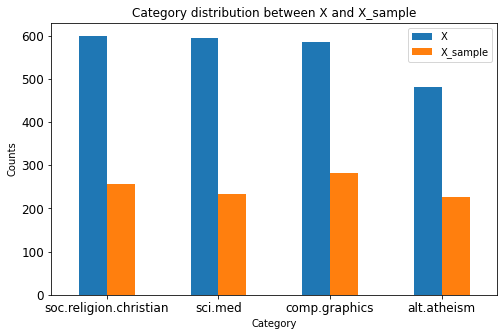

In [455]:
X_counts = X.category_name.value_counts()
X_smaple_counts = X_sample.category_name.value_counts()

concat_df = pd.concat({'X':X_counts, 'X_sample': X_smaple_counts}, axis=1)
concat_df.plot(kind='bar',
                title='Category distribution between X and X_sample',
                xlabel='Category',
                ylabel='Counts',
                rot=0, fontsize=12, figsize=(8,5))

In [456]:
import nltk

In [457]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]['unigrams']

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [458]:
X[0:4]
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [459]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [460]:
analyze = count_vect.build_analyzer()
analyze('Helllo World')

['helllo', 'world']

### Exercise 9

In [461]:
analyze(X.iloc[0].text)

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [462]:
X_counts.shape
count_vect.get_feature_names()[:10]

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

In [463]:
X[0:5]
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Exercise 10

In [464]:
fifth_rec = X_counts[4, 0:100].toarray()
find_1 = np.where(fifth_rec==1) 
target = find_1[1][1]
decoding = count_vect.get_feature_names()[target]
decoding

'01'

In [465]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [466]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [467]:
plot_x = ['term_' + str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [468]:
plot_y = ['doc_' + str(i) for i in list(X.index)[:20]]

In [469]:
plot_z = X_counts[0:20, 0:20].toarray()

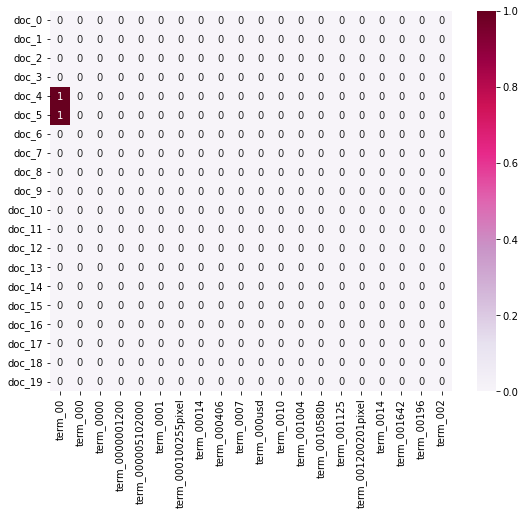

In [470]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9,7))
ax = sns.heatmap(df_todraw, cmap='PuRd', 
                    vmin=0, vmax=1, annot=True)

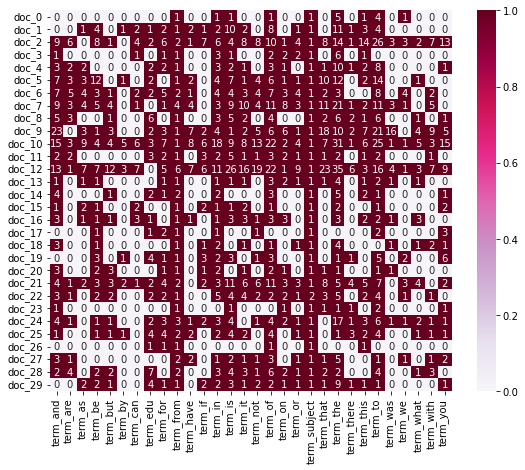

In [471]:
count_vect_MF30 = CountVectorizer(max_features=30)
X_fit_transform = count_vect_MF30.fit_transform(X.text)

plot_x = ["term_"+str(i) for i in count_vect_MF30.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(X.index[0:30])]
plot_z = X_fit_transform[0:30, 0:30].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [472]:
from sklearn.decomposition import PCA

In [473]:
X_reduced = PCA(n_components=2).fit_transform(X_counts.toarray())

In [474]:
X_reduced.shape

(2257, 2)

In [475]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

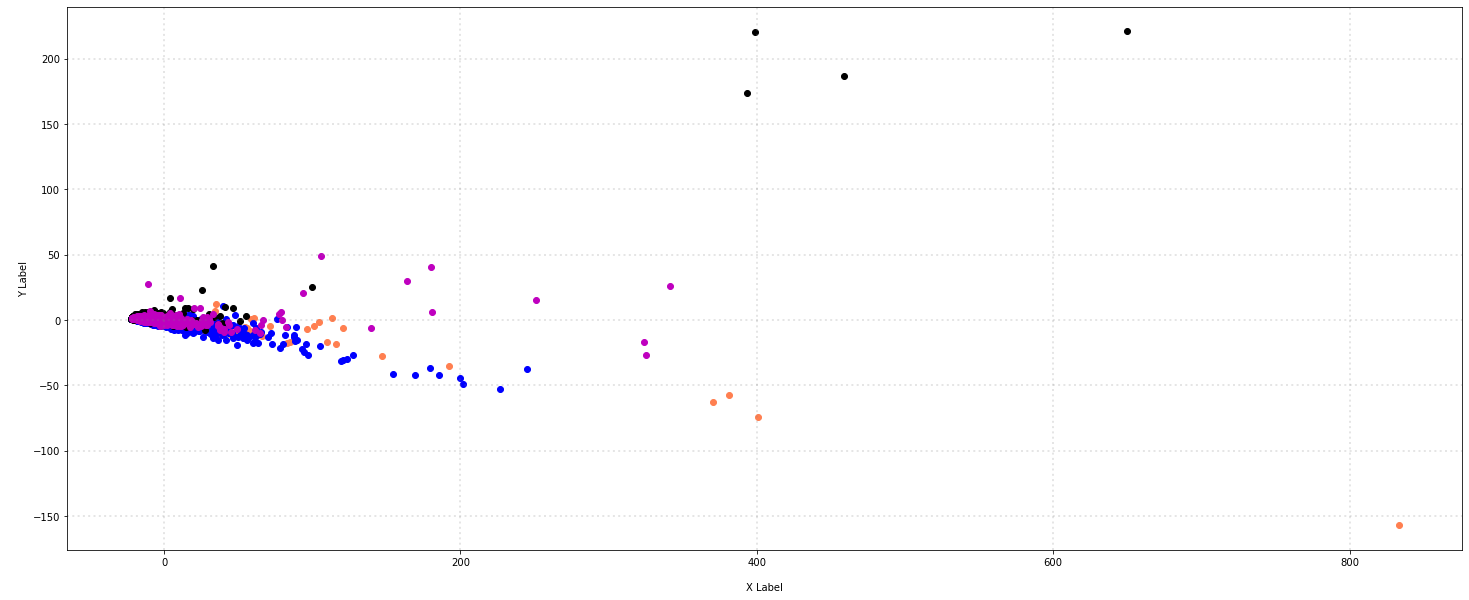

In [476]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Exercise 12

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



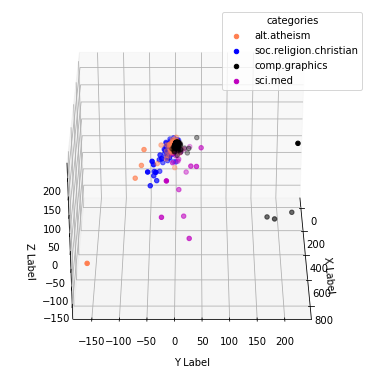

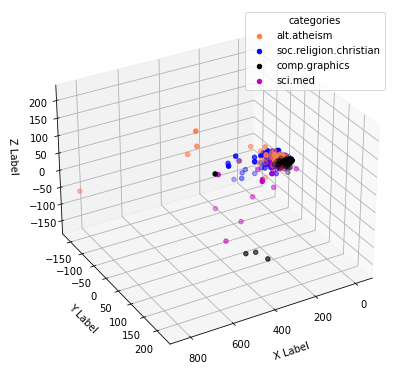

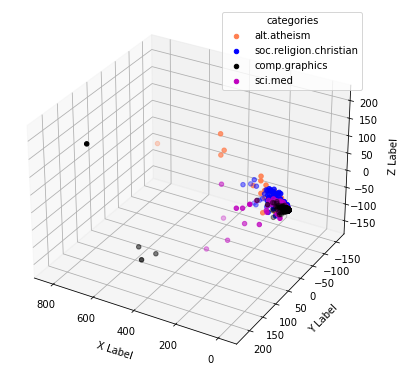

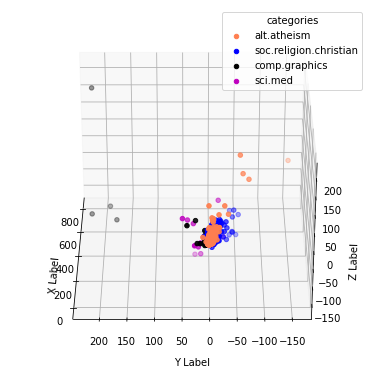

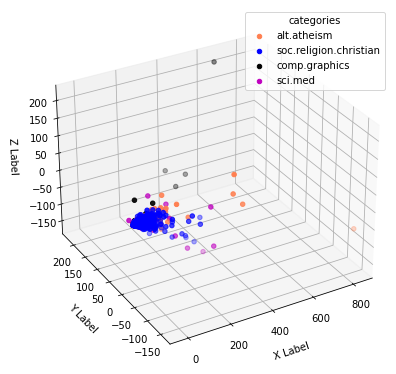

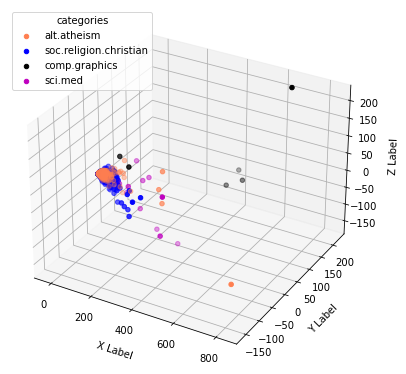

In [477]:
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

# show plots from different angles
for angle in range(0, 360, 60):
    fig = plt.figure(figsize = (15,5))
    ax = Axes3D(fig)    
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.legend(categories, title="categories")
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(30, angle)

In [478]:
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

In [479]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

134

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



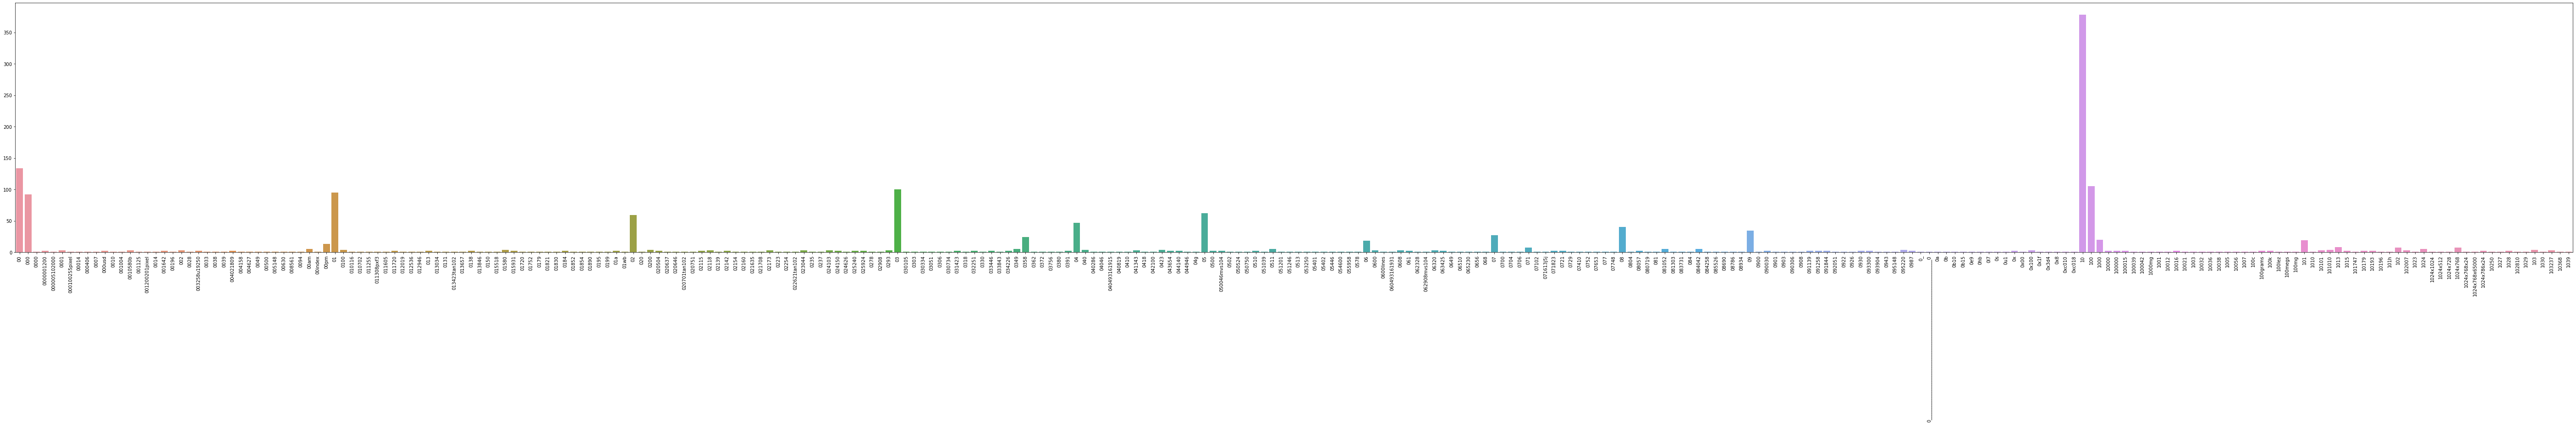

In [480]:
plt.subplots(figsize=(100,10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation=90);

### Exercise 13, 14, 15

In [481]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# term_frequencies[0]

import plotly.express as px

px_fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
px_fig.show()

In [482]:
import plotly.express as px

term_freq_df = pd.DataFrame(term_frequencies, columns=['freq'], index=count_vect.get_feature_names())
reduced_df = term_freq_df[term_freq_df['freq'] > 100] 
fig = px.bar(reduced_df, y="freq")
fig.show()

In [483]:
# sort values in the bar chart above  
sorted_df = reduced_df.sort_values(by='freq', ascending=False)
fig = px.bar(sorted_df, y="freq")
fig.show()

In [484]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [485]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_

array([0, 1, 2, 3], dtype=int64)

In [486]:
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


### Exercise 16

In [487]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 0]"
...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr...","[0, 0, 0, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha...","[0, 0, 0, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G...","[0, 0, 0, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[From, :, Dan, Wallach, <, dwallach, @, cs.ber...","[0, 0, 0, 0]"


In [488]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [489]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [490]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [491]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


----
# Practices with the New Dataset


In [492]:
amazon = "sentiment labelled sentences/amazon_cells_labelled.txt"
imdb = "sentiment labelled sentences/imdb_labelled.txt"
yelp = "sentiment labelled sentences/yelp_labelled.txt"

In [493]:
cols = ['text', 'score']
amazon = pd.read_csv(amazon, delimiter='\t', names=cols, header=None)
imdb = pd.read_csv(imdb, delimiter='\t', names=cols, header=None)
yelp = pd.read_csv(yelp, delimiter='\t', names=cols, header=None)

In [494]:
print(amazon.shape)
amazon.head()

(1000, 2)


,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [495]:
print(imdb.shape)
imdb.head()

(748, 2)


,text,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [496]:
print(yelp.shape)
yelp.head()

(1000, 2)


,text,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [497]:
# add new column 
amazon['site'] = 'amazon'
imdb['site'] = 'imdb'
yelp['site'] = 'yelp'

In [498]:
X = pd.concat([amazon, imdb, yelp], ignore_index=True)
X

,text,score,site
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


In [499]:
sentiment = {0:'negative', 1:'positive'}
X['sentiment'] = X['score'].map(sentiment)
X

,text,score,site,sentiment
0,So there is no way for me to plug it in here i...,0,amazon,negative
1,"Good case, Excellent value.",1,amazon,positive
2,Great for the jawbone.,1,amazon,positive
3,Tied to charger for conversations lasting more...,0,amazon,negative
4,The mic is great.,1,amazon,positive
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp,negative
2744,Appetite instantly gone.,0,yelp,negative
2745,Overall I was not impressed and would not go b...,0,yelp,negative
2746,"The whole experience was underwhelming, and I ...",0,yelp,negative


In [500]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,site,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [501]:
sum(X.duplicated())

17

In [502]:
# drop duplicates
X.drop_duplicates(keep='first', inplace=True)
sum(X.duplicated())

0

In [503]:
X.shape

(2731, 4)

In [504]:
# get 1000 sample in random 
X_sample = X.sample(n = 1000)
X_sample

,text,score,site,sentiment
2502,Main thing I didn't enjoy is that the crowd is...,0,yelp,negative
620,Steer clear of this product and go with the ge...,0,amazon,negative
1299,"I found this move beautiful, enjoyable, and up...",1,imdb,positive
2383,We were promptly greeted and seated.,1,yelp,positive
297,This one works and was priced right.,1,amazon,positive
...,...,...,...,...
936,I kept catching the cable on the seat and I ha...,0,amazon,negative
1166,Damian is so talented and versatile in so many...,1,imdb,positive
229,I ordered this for sony Ericsson W810i but I t...,0,amazon,negative
1408,The story line is just awful!,0,imdb,negative


In [505]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

,text,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [506]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [507]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,text,score,site,sentiment
0,So there is no way for me to plug it in here i...,0,amazon,negative
10,And the sound quality is great.,1,amazon,positive
20,I went on Motorola's website and followed all ...,0,amazon,negative
30,"This is a simple little phone to use, but the ...",0,amazon,negative
40,"It has a great camera thats 2MP, and the pics ...",1,amazon,positive
50,Not loud enough and doesn't turn on like it sh...,0,amazon,negative
60,Essentially you can forget Microsoft's tech su...,0,amazon,negative
70,Mic Doesn't work.,0,amazon,negative
80,I wear it everyday and it holds up very well.,1,amazon,positive
90,For a product that costs as much as this one d...,0,amazon,negative


In [508]:
X[X['sentiment']=='positive'].iloc[::10][:5]

,text,score,site,sentiment
1,"Good case, Excellent value.",1,amazon,positive
21,I bought this to use with my Kindle Fire and a...,1,amazon,positive
44,Excellent bluetooth headset.,1,amazon,positive
61,I really recommend this faceplates since it lo...,1,amazon,positive
78,"I love this phone , It is very handy and has a...",1,amazon,positive


positive    1376
negative    1355
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment distribution'}>

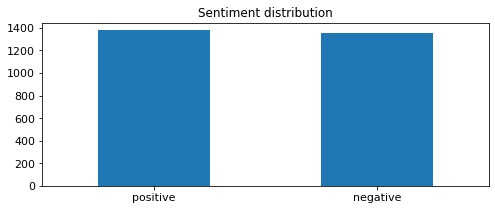

In [509]:
# count the number of sentiment in the dataset
print(X.sentiment.value_counts())

# plot a bar chart
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot:title={'center':'Category Distribution'}, xlabel='Category Name', ylabel='Counts'>

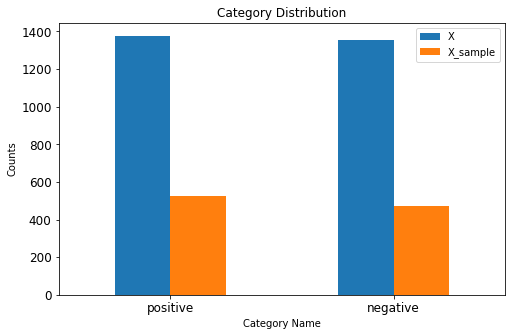

In [510]:
# plot a side by side bar chart

X_counts = X.sentiment.value_counts()
X_sample_counts = X_sample.sentiment.value_counts()

concate_dataframes = pd.concat({'X': X_counts, 'X_sample': X_sample_counts}, axis=1)
concate_dataframes.plot(kind = 'bar',
                        title = 'Category Distribution', 
                        xlabel='Category Name',
                        ylabel='Counts',
                        rot = 0, fontsize = 12, figsize = (8,5))

In [511]:
import nltk

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X

,text,score,site,sentiment,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,positive,"[The, mic, is, great, .]"
...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp,negative,"[I, think, food, should, have, flavor, and, te..."
2744,Appetite instantly gone.,0,yelp,negative,"[Appetite, instantly, gone, .]"
2745,Overall I was not impressed and would not go b...,0,yelp,negative,"[Overall, I, was, not, impressed, and, would, ..."
2746,"The whole experience was underwhelming, and I ...",0,yelp,negative,"[The, whole, experience, was, underwhelming, ,..."


In [512]:
X[:1]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
Name: unigrams, dtype: object

In [513]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [514]:
X_counts.shape

(2731, 5155)

In [515]:
count_vect.get_feature_names()[0:10]

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [516]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [517]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [518]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [519]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [520]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2731, 2)

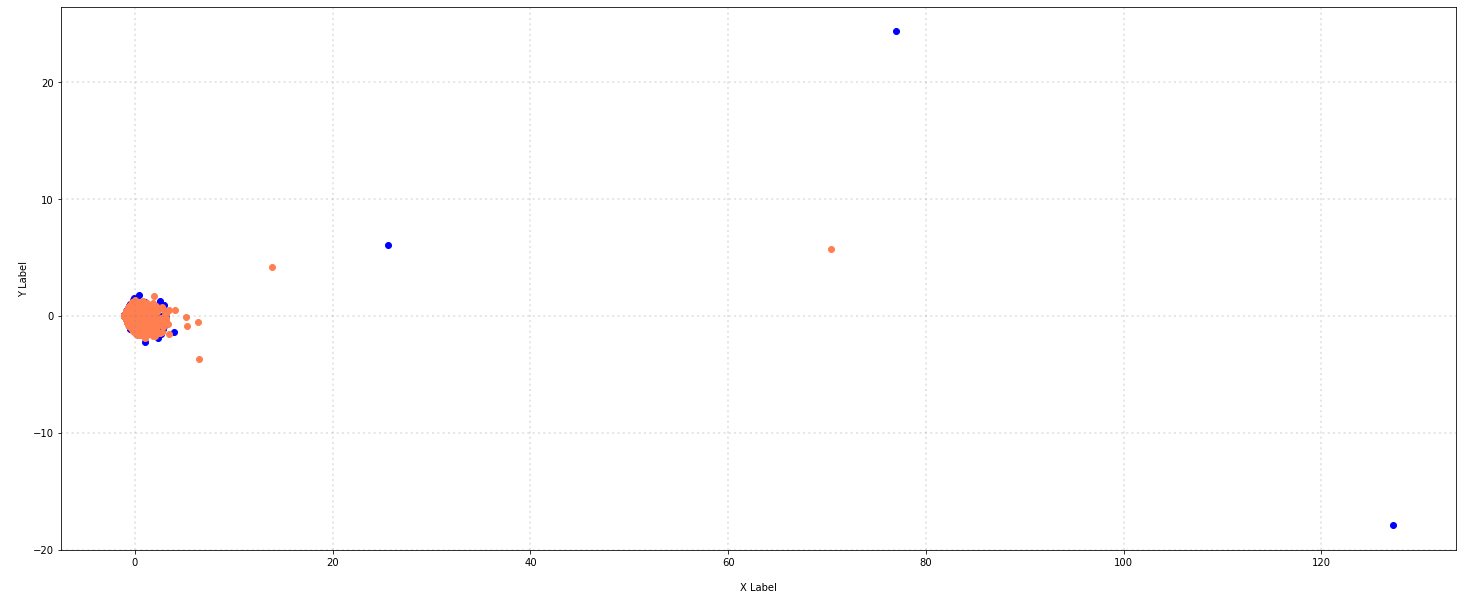

In [521]:
# generate a scatter plot 
col = ['blue', 'coral']
sentiment = ["negative", "positive"]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, sentiment):
    xs = X_reduced[X['sentiment'] == s].T[0]
    ys = X_reduced[X['sentiment'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

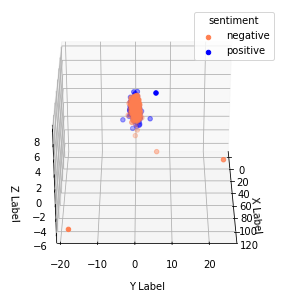

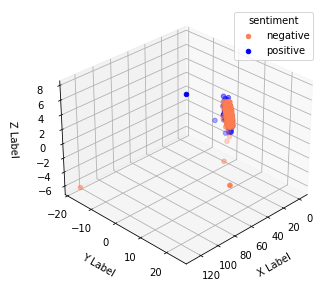

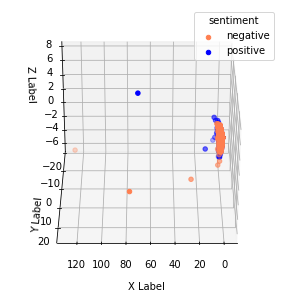

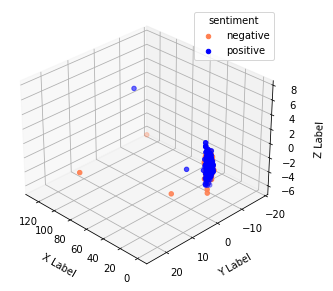

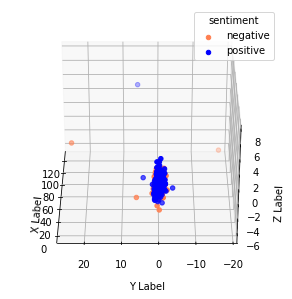

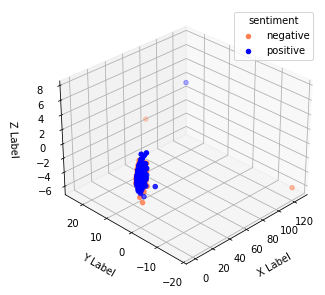

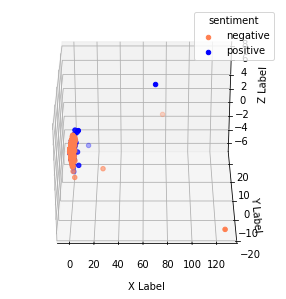

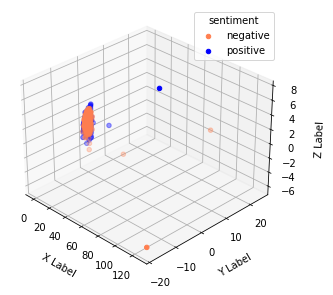

In [522]:
reduced_X = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue']

for angle in range(0, 360, 45):
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(projection='3d')   
    for c, s in zip(col, sentiment):
        xs = reduced_X[X['sentiment'] == s].T[0]
        ys = reduced_X[X['sentiment'] == s].T[1]
        zs = reduced_X[X['sentiment'] == s].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.legend(sentiment, title="sentiment")
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(30, angle)

In [523]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

1

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



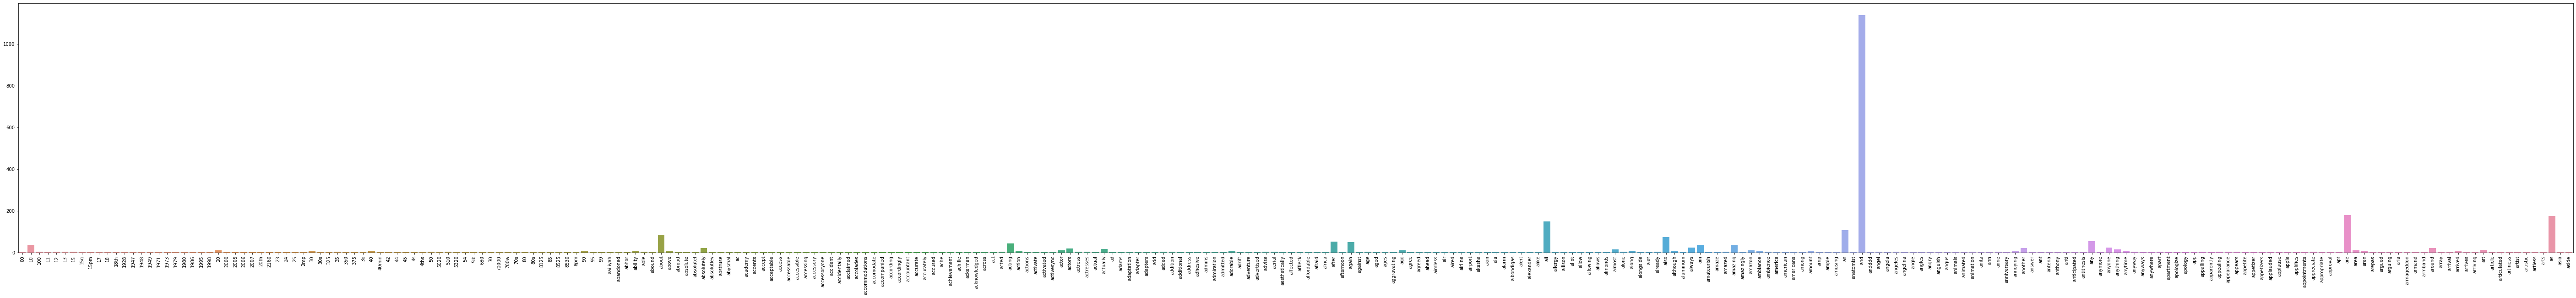

In [524]:
# generate a bar chart for 300 terms 
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [525]:
term_freq_df = pd.DataFrame(term_frequencies, columns=['freq'], index=count_vect.get_feature_names())
reduced_df = term_freq_df[term_freq_df['freq'] > 100] 
fig = px.bar(reduced_df, y="freq")
fig.show()

In [526]:
# sort values in the bar chart above  
sorted_df = reduced_df.sort_values(by='freq', ascending=False)
fig = px.bar(sorted_df, y="freq")
fig.show()

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



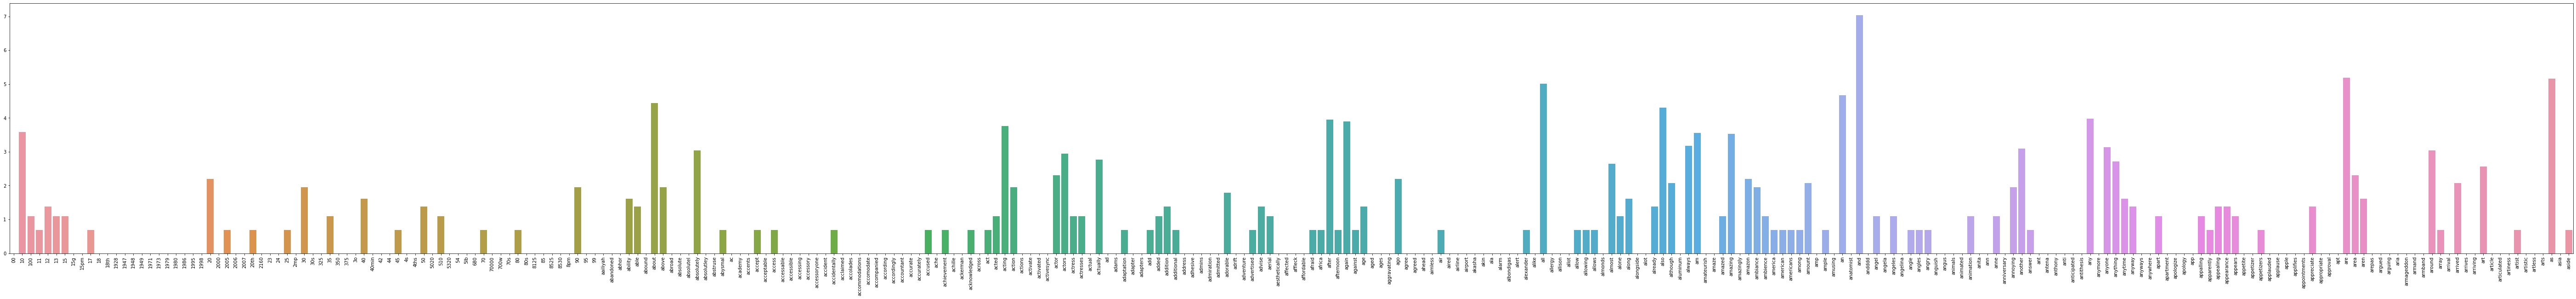

In [527]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [528]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
# print(mlb.classes_)
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

,text,score,site,sentiment,unigrams,bin_sentiment
0,So there is no way for me to plug it in here i...,0,amazon,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,amazon,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,amazon,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,amazon,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,amazon,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,amazon,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,amazon,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,amazon,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,amazon,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


In [529]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [530]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [531]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


----
# 3. TF_IDF & Naive Bayes Classifier

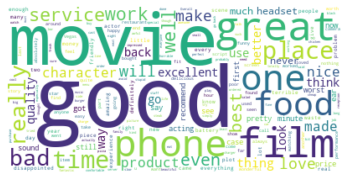

In [532]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

tokenized_text = ' '.join(X.text)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(tokenized_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [533]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [534]:
# TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X.text, X.score, test_size=0.2, random_state=42)
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)

MultinomialNB()

In [535]:
X_test = tfidf.transform(X_test)
tfidf_pred = mnb_clf.predict(X_test)
tfidf_acc = metrics.accuracy_score(y_test, tfidf_pred)

In [536]:
# Count Vect
X_train, X_test, y_train, y_test = train_test_split(X.text, X.score, test_size=0.2, random_state=42)
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)

MultinomialNB()

In [537]:
X_test = count_vect.transform(X_test)
count_pred = mnb_clf.predict(X_test)
count_acc = metrics.accuracy_score(y_test, count_pred)

In [538]:
# accuracy score
print('Accuracy score(TF-IDF): ', tfidf_acc)
print('Accuracy score(Count Vect): ', count_acc)

Accuracy score(TF-IDF):  0.8098720292504571
Accuracy score(Count Vect):  0.7861060329067642


In [539]:
# classification report
print('TF-IDF')
print(metrics.classification_report(y_test, tfidf_pred, target_names=['Positive', 'Negative']))
print('-----------------------------------------------------------')
print('Count Vect')
print(metrics.classification_report(y_test, count_pred, target_names=['Positive', 'Negative']))

TF-IDF
              precision    recall  f1-score   support

    Positive       0.79      0.83      0.81       270
    Negative       0.83      0.79      0.81       277

    accuracy                           0.81       547
   macro avg       0.81      0.81      0.81       547
weighted avg       0.81      0.81      0.81       547

-----------------------------------------------------------
Count Vect
              precision    recall  f1-score   support

    Positive       0.76      0.82      0.79       270
    Negative       0.81      0.75      0.78       277

    accuracy                           0.79       547
   macro avg       0.79      0.79      0.79       547
weighted avg       0.79      0.79      0.79       547



According to the accuracy scores and classification reports above, Naive Bayes with TF_IDF had a better result than that with Count Vectorizer. The reason why like this is because TF-IDF not only focuses on the frequency of words present in the corpus but also provides the importance of the words. 

----
# 4. Possible Improvements

Some improvements can be made on those codes are as follows:
- remove stopwords and punctuations
- apply stemming and lemmatization
- use functions to avoid repeating codes